c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


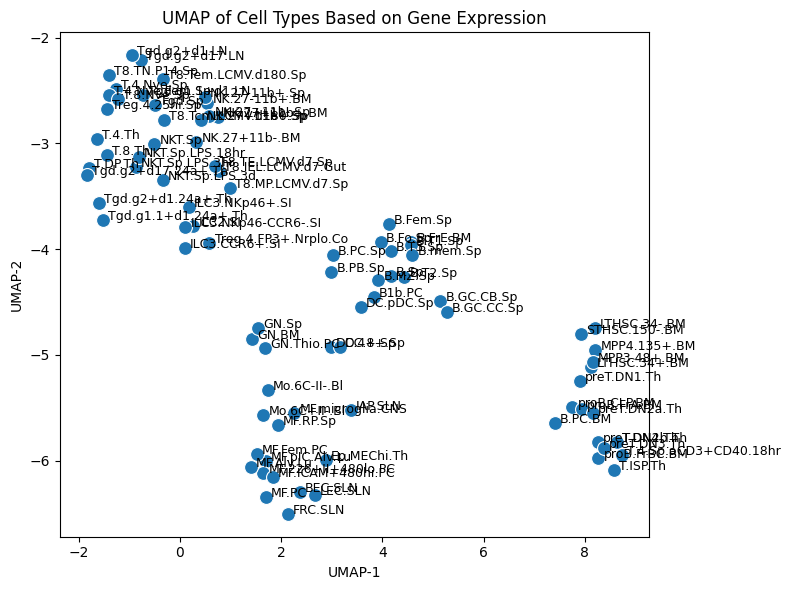

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

import importlib
import functions
importlib.reload(functions)
functions.set_user('Helen')
data = functions.call_data_clean(p_threshold=1.3)

#RNA
RNA_seq_T = data['RNA_seq_T']

scaler = StandardScaler()
RNA_seq_scaled = scaler.fit_transform(RNA_seq_T)

reducer = umap.UMAP(random_state=42)
umap_RNA_prep= reducer.fit_transform(RNA_seq_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_RNA_prep[:, 0], y=umap_RNA_prep[:, 1], s=100)


for i, label in enumerate(RNA_seq_T.index):
    plt.text(umap_RNA_prep[i, 0]+0.1, umap_RNA_prep[i, 1], label, fontsize=9)

plt.title("UMAP of Cell Types Based on Gene Expression")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

Now that we have our UMAP we will perform and compare the elbow and silhouette method to determine the optimal amount of clusters for kmeans clustering

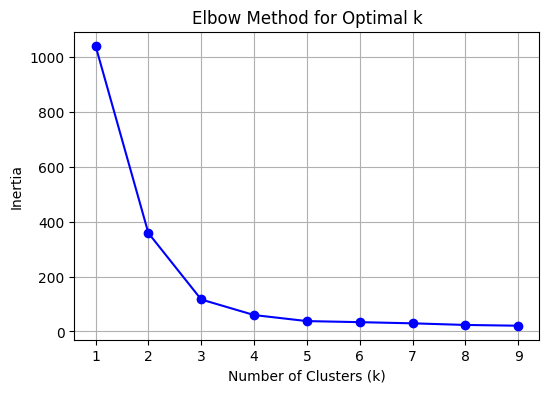

In [8]:
#elbow method to determine amount of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

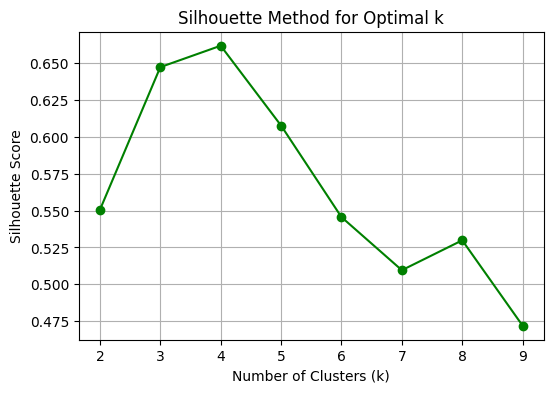

In [9]:
#test silhouette sore for kmeans clusterin
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):  # must be ≥2
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    labels = kmeans.labels_
    score = silhouette_score(umap_RNA_prep, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

-> 3 and 5 both seem to be a good number of clusters, as they both show elbows in the elbow method and have local peaks in their silhouette score. This might signify that cells can be divided into 3 main groups that can be further divided into 5 subgroups

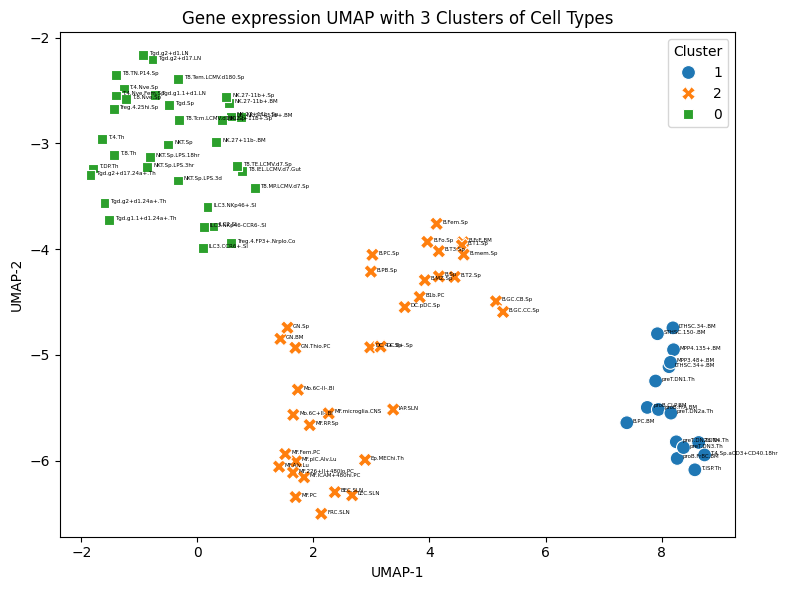

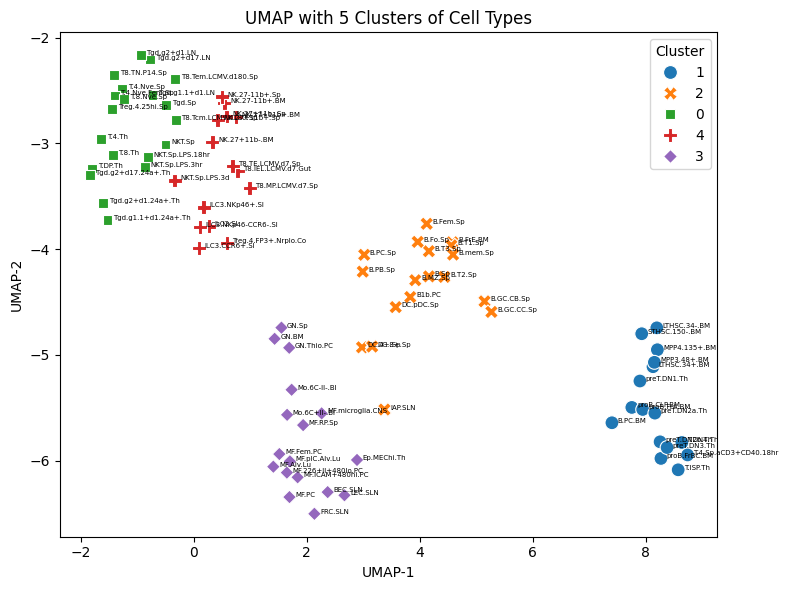

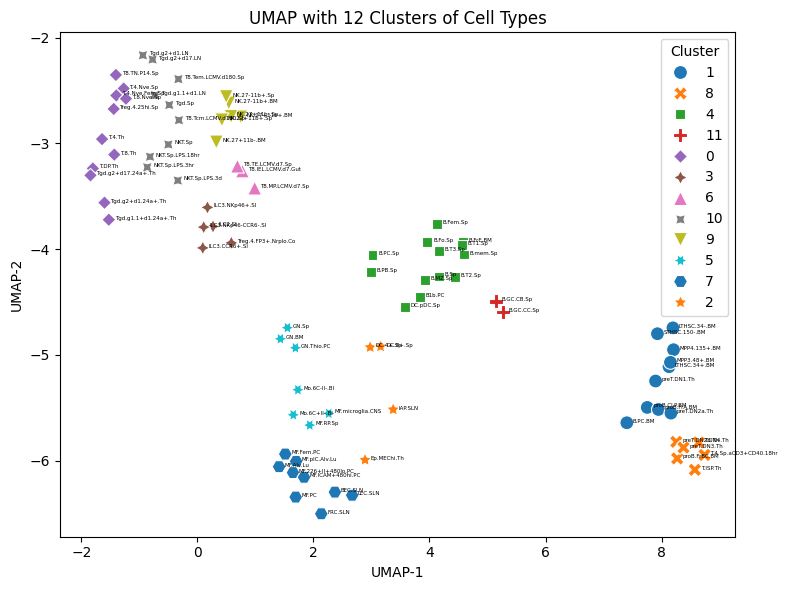


KMeans Clustering Summary (k=3):


,kmeans3,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
2,2,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."



KMeans Clustering Summary (k=5):


,kmeans5,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
2,2,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
3,3,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
4,4,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."



KMeans Clustering Summary (k=12):


,kmeans12,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
2,10,"[T8.Tcm.LCMV.d180.Sp, T8.Tem.LCMV.d180.Sp, NKT..."
3,11,"[B.GC.CB.Sp, B.GC.CC.Sp]"
4,2,"[DC.4+.Sp, DC.8+.Sp, IAP.SLN, Ep.MEChi.Th]"
5,3,"[Treg.4.FP3+.Nrplo.Co, ILC2.SI, ILC3.NKp46-CCR..."
6,4,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
7,5,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
8,6,"[T8.IEL.LCMV.d7.Gut, T8.TE.LCMV.d7.Sp, T8.MP.L..."
9,7,"[MF.pIC.Alv.Lu, MF.226+II+480lo.PC, MF.ICAM+48..."


In [ ]:
from sklearn.cluster import KMeans

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
umap_RNA_seq["CellType"] = RNA_seq_T.index

# kmeans with 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42)
umap_RNA_seq["kmeans3"] = kmeans3.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans3", style="kmeans3", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=4)

plt.title("Gene expression UMAP with 3 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=42)
umap_RNA_seq["kmeans5"] = kmeans5.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans5", style="kmeans5", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=5)

plt.title("UMAP with 5 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 12 clusters (amount cell types)
kmeans12 = KMeans(n_clusters=12, random_state=42)
umap_RNA_seq["kmeans12"] = kmeans12.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans12", style="kmeans12", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=4)

plt.title("UMAP with 12 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# table view of cell types
for k in [3, 5, 12]:
    cluster_col = f"kmeans{k}"
    kmeans_summary = umap_RNA_seq.groupby(cluster_col)["CellType"].apply(list).reset_index()
    print(f"\nKMeans Clustering Summary (k={k}):")
    display(kmeans_summary)


now we will perform leiden clustering to see how it compares

c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



qc_lineage_mapping after dropping duplicates and setting index:
                                  Lineage
CellType                                
LTHSC.34-.BM                   Stem&Prog
LTHSC.34+.BM                   Stem&Prog
STHSC.150-.BM                  Stem&Prog
MPP4.135+.BM                   Stem&Prog
proB.CLP.BM                            B
...                                  ...
FRC.CD140a+.Madcam-.CD35-.SLN     stroma
IAP.SLN                           stroma
BEC.SLN                           stroma
LEC.SLN                           stroma
Ep.MEChi.Th                       stroma

[90 rows x 1 columns]

umap_RNA_seq head with merged Lineage:
                   UMAP1     UMAP2    Lineage
LTHSC.34-.BM   8.195832 -4.743562  Stem&Prog
LTHSC.34+.BM   8.128364 -5.111130  Stem&Prog
STHSC.150-.BM  7.928847 -4.799310  Stem&Prog
MPP4.135+.BM   8.205855 -4.950552  Stem&Prog
proB.CLP.BM    7.753726 -5.496077          B


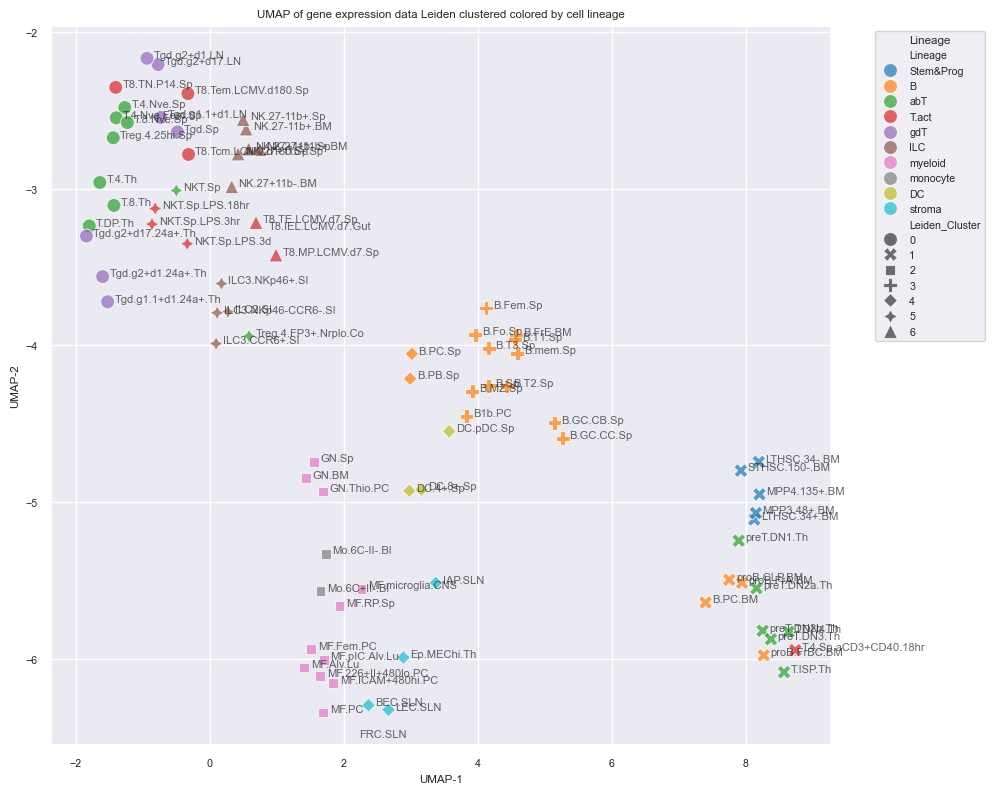


Plotting UMAP with Scanpy for comparison (colored by Lineage):


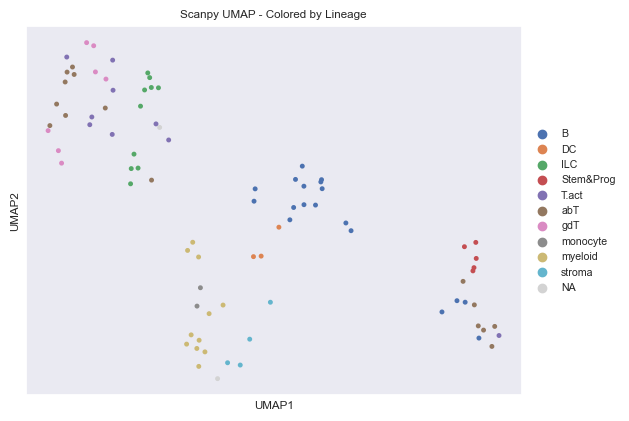


Plotting UMAP with Scanpy for comparison (colored by Leiden Clusters):


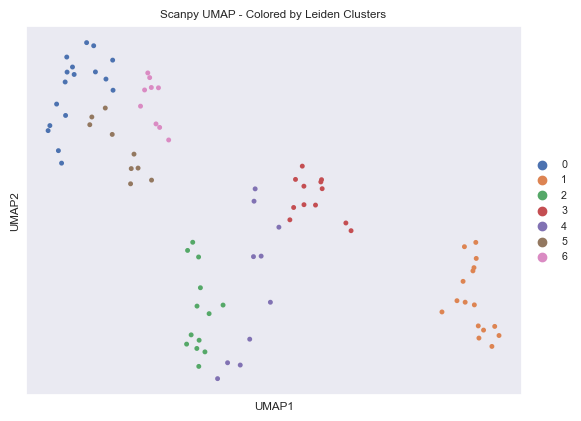

In [22]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

qc= data['QC_metrics']

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
adata = ad.AnnData(X=RNA_seq_T.values)
adata.obs_names = RNA_seq_T.index
adata.obsm["X_umap"] = umap_RNA_prep
adata.var_names= RNA_seq_T.columns

scaler = StandardScaler()
RNA_scaled = scaler.fit_transform(RNA_seq_T)
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(RNA_scaled)
adata.obsm['X_umap'] = umap_result

qc_lineage_mapping = qc[['CellType', 'Lineage']].drop_duplicates(subset=['CellType'], keep='first')
qc_lineage_mapping.set_index('CellType', inplace=True)
print("\nqc_lineage_mapping after dropping duplicates and setting index:\n", qc_lineage_mapping)
adata.obs = adata.obs.merge(qc_lineage_mapping, left_index=True, right_index=True, how='left')
umap_RNA_seq = umap_RNA_seq.merge(qc_lineage_mapping, left_index=True, right_index=True, how='left')
print("\numap_RNA_seq head with merged Lineage:\n", umap_RNA_seq.head())

sc.pp.neighbors(adata, use_rep="X", n_neighbors=10, random_state=42)
sc.tl.leiden(adata, resolution=1.9)

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].values
umap_RNA_seq["Leiden_Cluster"].to_csv("leiden_clusters.csv")


plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_RNA_seq, x="UMAP1", y="UMAP2",
    hue="Lineage", style="Leiden_Cluster",
    s=100, palette="tab10",alpha=0.7
)
for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row.name, fontsize=8, alpha=0.7)

plt.title("UMAP of gene expression data Leiden clustered colored by cell lineage")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nPlotting UMAP with Scanpy for comparison (colored by Lineage):")
adata.obs['Lineage'] = adata.obs['Lineage'].astype('category')
sc.pl.umap(adata, color='Lineage', title="Scanpy UMAP - Colored by Lineage", size=50)

print("\nPlotting UMAP with Scanpy for comparison (colored by Leiden Clusters):")
adata.obs['leiden'] = adata.obs['leiden'].astype('category') # Ensure Leiden is categorical
sc.pl.umap(adata, color='leiden', title="Scanpy UMAP - Colored by Leiden Clusters", size=50)

we will visualize grouped cell types in a table and countplot

C:\Users\helen\AppData\Local\Temp\ipykernel_36476\933239843.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_36476\933239843.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_36476\933239843.py:17: FutureWarning: 

Passing `pal


Cluster 0:
  - T.DP.Th
  - T.4.Th
  - T.8.Th
  - T.4.Nve.Sp
  - T.4.Nve.Fem.Sp
  - T.8.Nve.Sp
  - Treg.4.25hi.Sp
  - T8.TN.P14.Sp
  - T8.Tcm.LCMV.d180.Sp
  - T8.Tem.LCMV.d180.Sp
  - Tgd.g2+d17.24a+.Th
  - Tgd.g2+d17.LN
  - Tgd.g2+d1.24a+.Th
  - Tgd.g2+d1.LN
  - Tgd.g1.1+d1.24a+.Th
  - Tgd.g1.1+d1.LN
  - Tgd.Sp

Cluster 1:
  - LTHSC.34-.BM
  - LTHSC.34+.BM
  - STHSC.150-.BM
  - MPP4.135+.BM
  - proB.CLP.BM
  - proB.FrA.BM
  - proB.FrBC.BM
  - B.PC.BM
  - preT.DN1.Th
  - preT.DN2a.Th
  - preT.DN2b.Th
  - preT.DN3.Th
  - T.DN4.Th
  - T.ISP.Th
  - T.4.Sp.aCD3+CD40.18hr
  - MPP3.48+.BM

Cluster 2:
  - GN.BM
  - GN.Sp
  - GN.Thio.PC
  - Mo.6C+II-.Bl
  - Mo.6C-II-.Bl
  - MF.pIC.Alv.Lu
  - MF.226+II+480lo.PC
  - MF.ICAM+480hi.PC
  - MF.RP.Sp
  - MF.Alv.Lu
  - MF.microglia.CNS
  - MF.PC
  - MF.Fem.PC

Cluster 3:
  - B.FrE.BM
  - B1b.PC
  - B.T1.Sp
  - B.T2.Sp
  - B.T3.Sp
  - B.Sp
  - B.Fem.Sp
  - B.MZ.Sp
  - B.Fo.Sp
  - B.mem.Sp
  - B.GC.CB.Sp
  - B.GC.CC.Sp

Cluster 4:
  - B.PB.Sp
  - B.PC.Sp

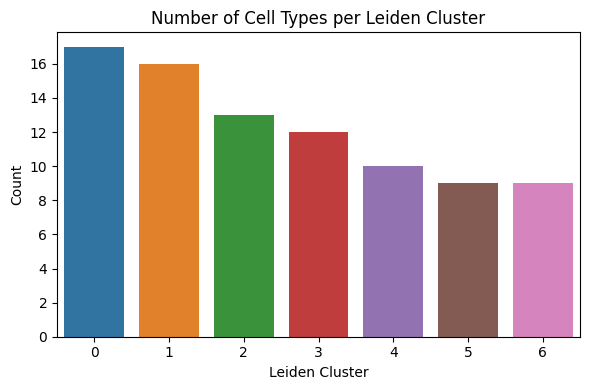


Leiden Clustering Summary:


,Leiden_Cluster,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
2,2,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
3,3,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
4,4,"[B.PB.Sp, B.PC.Sp, DC.4+.Sp, DC.8+.Sp, DC.pDC...."
5,5,"[Treg.4.FP3+.Nrplo.Co, NKT.Sp, NKT.Sp.LPS.3hr,..."
6,6,"[T8.IEL.LCMV.d7.Gut, T8.TE.LCMV.d7.Sp, T8.MP.L..."


In [13]:

leiden_col = "Leiden_Cluster"
if leiden_col not in umap_RNA_seq.columns:
    umap_RNA_seq[leiden_col] = adata.obs["leiden"].values

# Add CellType column if missing
if "CellType" not in umap_RNA_seq.columns:
    umap_RNA_seq["CellType"] = umap_RNA_seq.index

clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))

for cluster, cells in clustered_cell_types.items():
    print(f"\nCluster {cluster}:")
    for cell in cells:
        print(f"  - {cell}")

plt.figure(figsize=(6, 4))
sns.countplot(x=leiden_col, data=umap_RNA_seq, palette="tab10")
plt.title("Number of Cell Types per Leiden Cluster")
plt.xlabel("Leiden Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].astype(str).reindex(umap_RNA_seq.index)
leiden_summary = umap_RNA_seq.groupby(leiden_col)["CellType"].apply(list).reset_index()
print("\nLeiden Clustering Summary:")
display(leiden_summary)


now we will correlate leiden/kmeans clusters with their celltype/ lineage

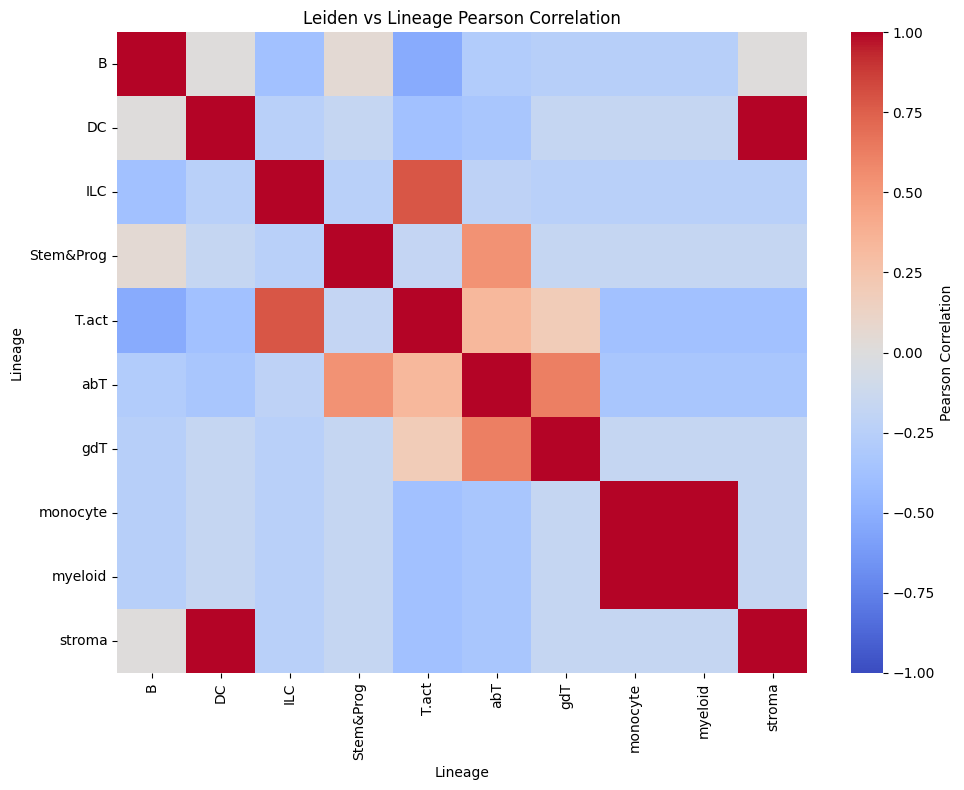

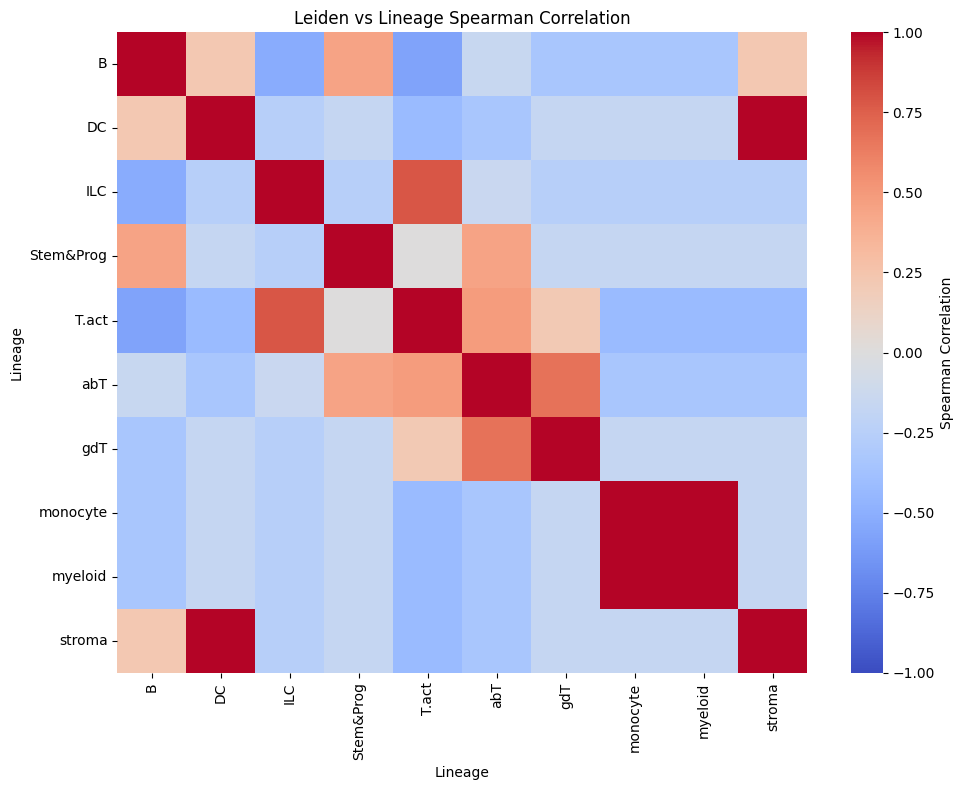

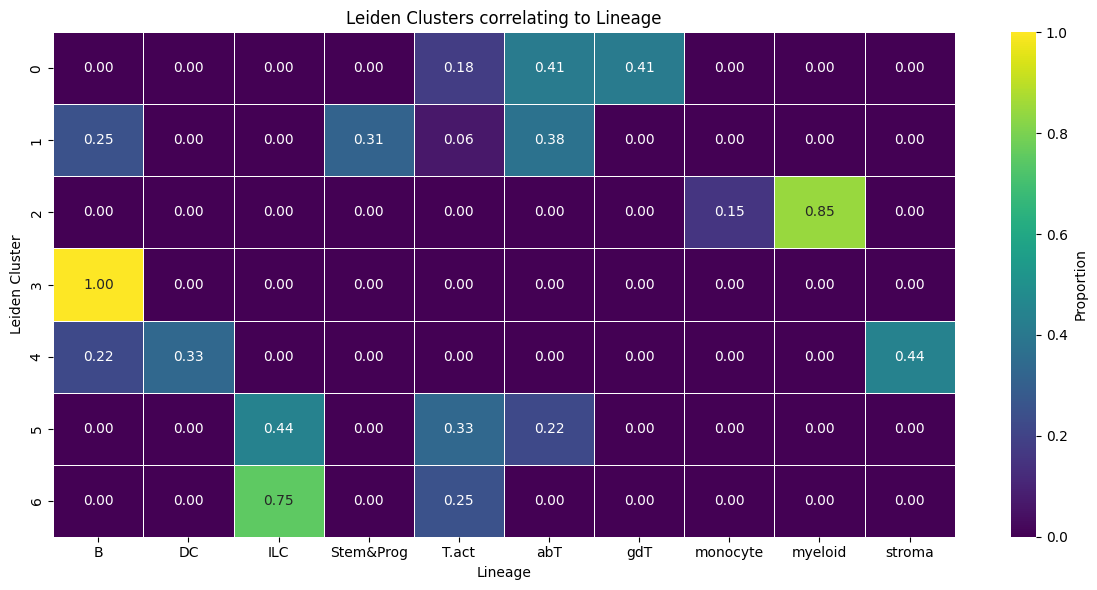

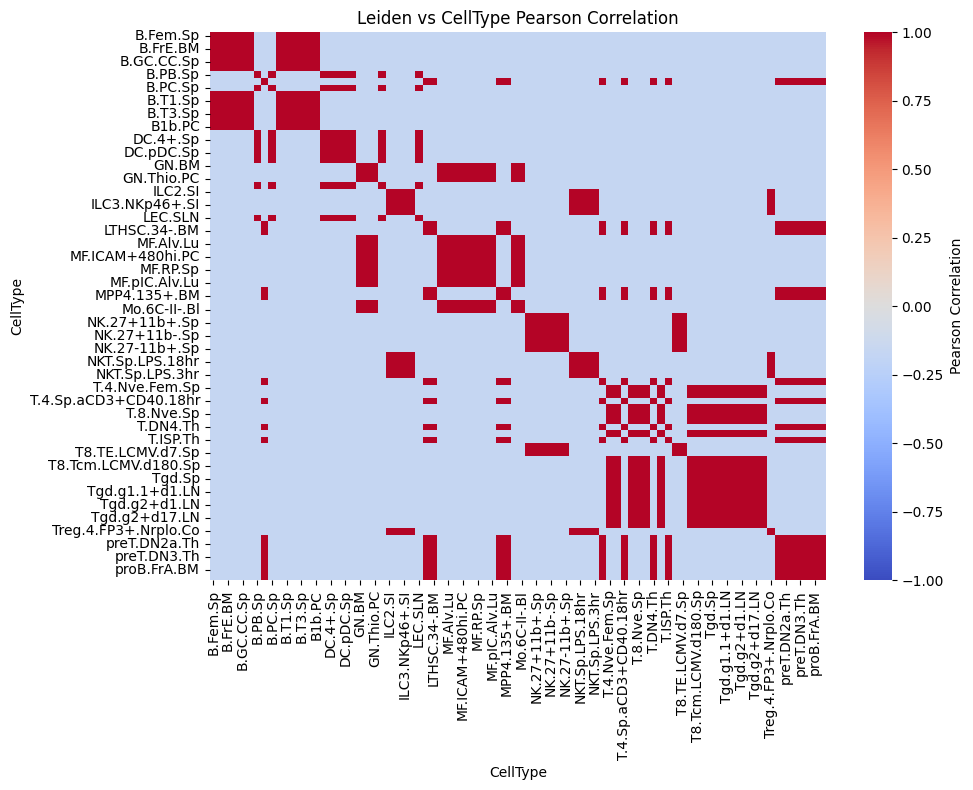

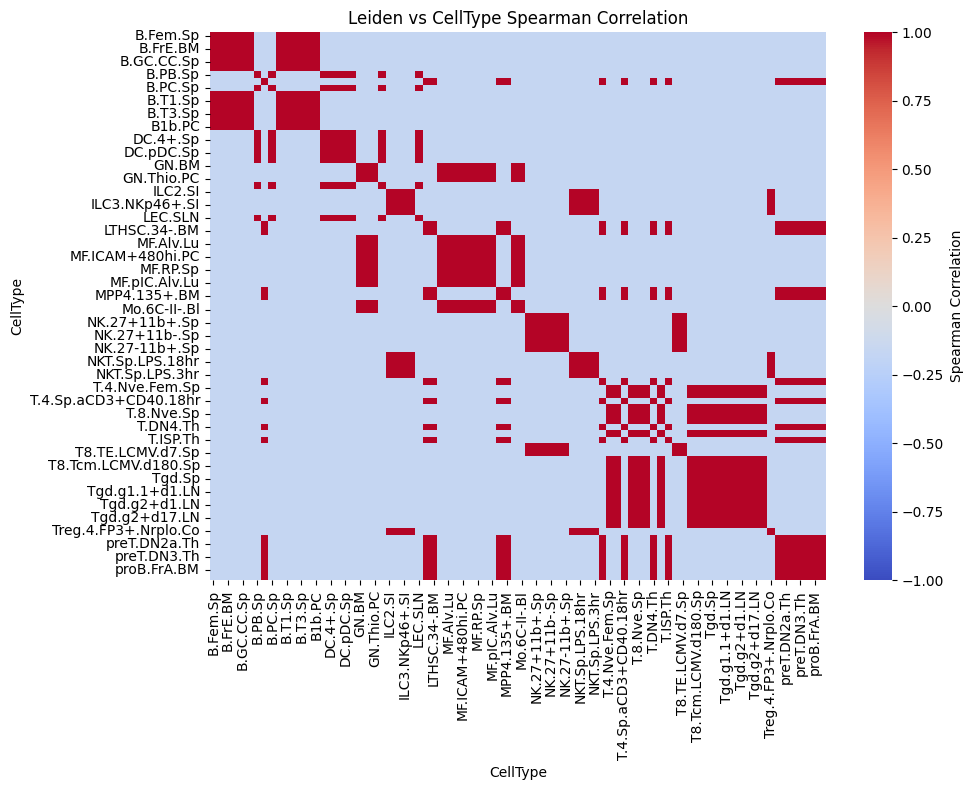

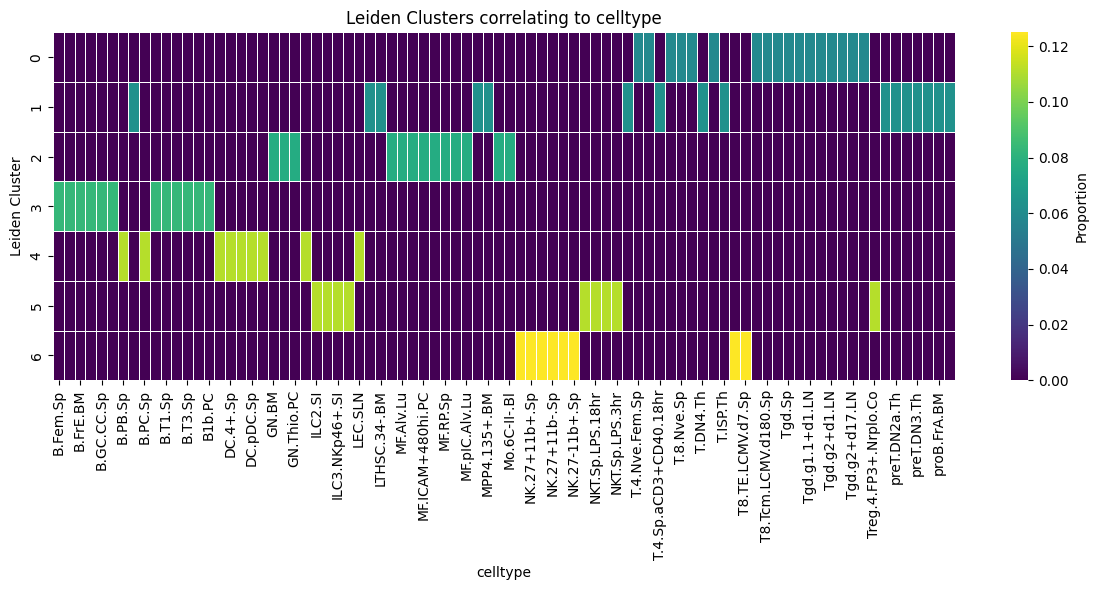

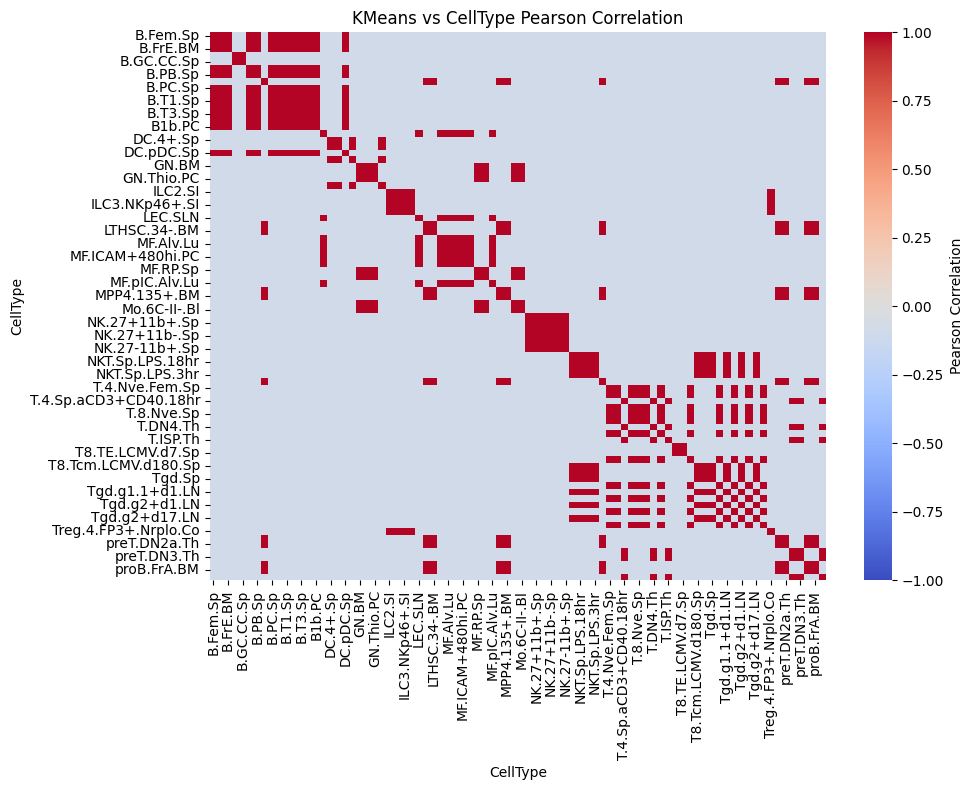

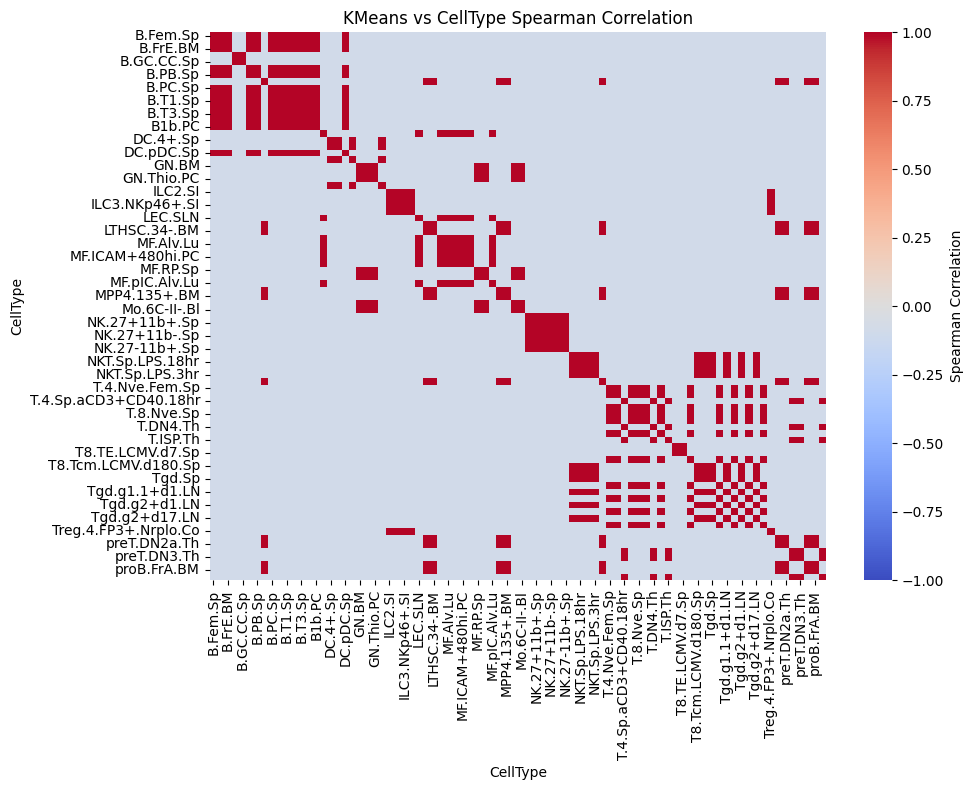

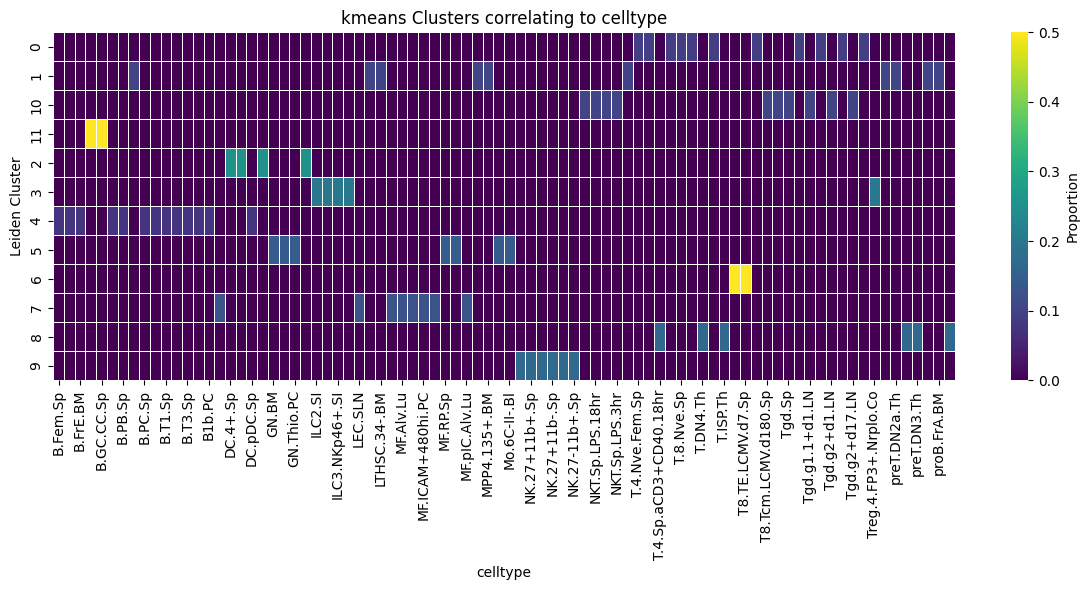

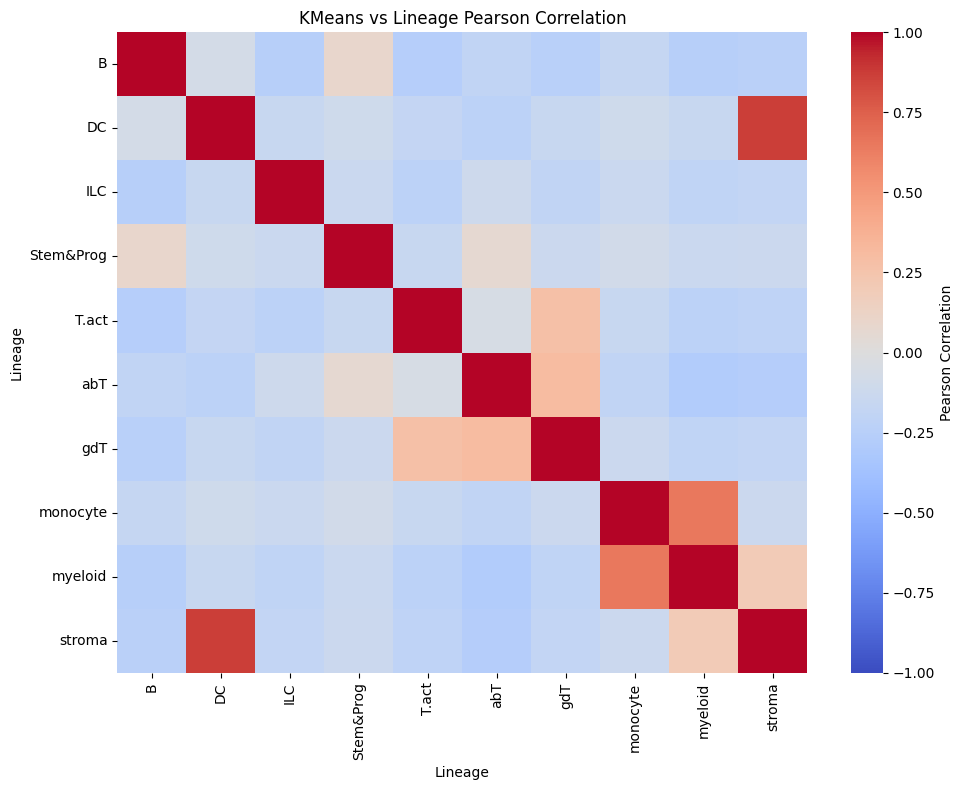

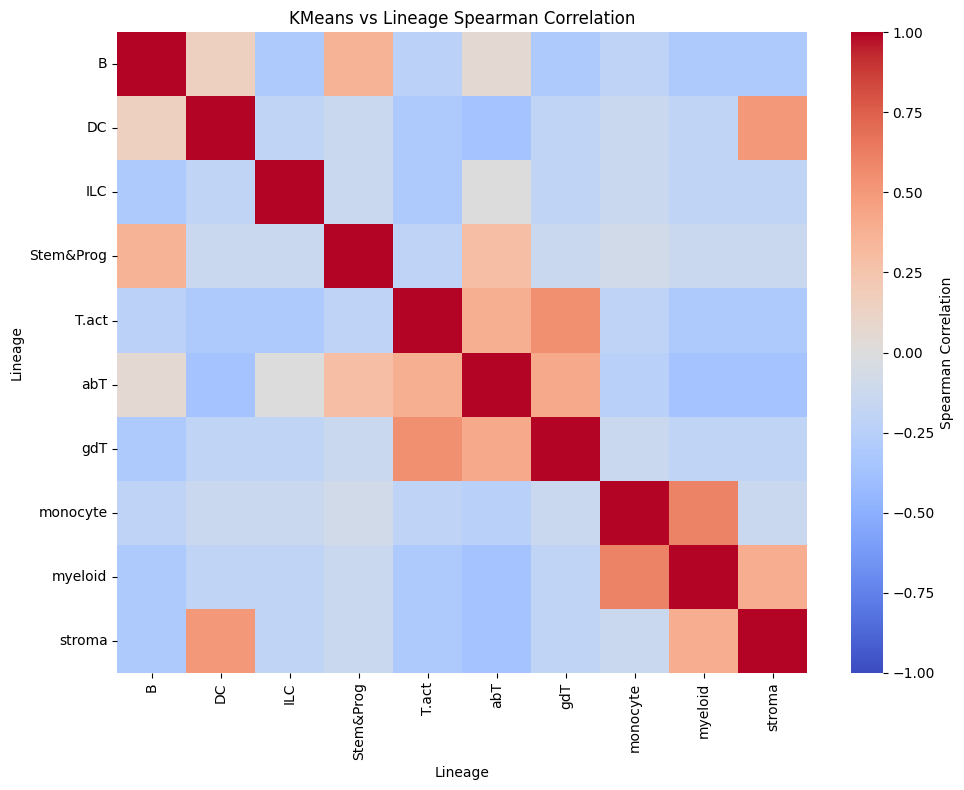

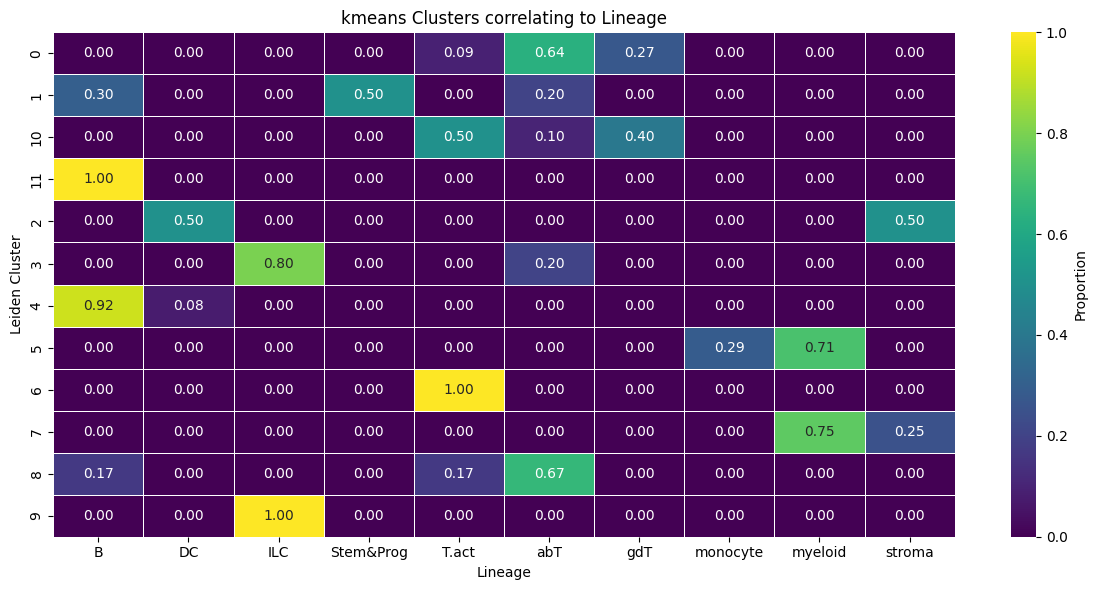

In [ ]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
adata = ad.AnnData(X=RNA_seq_T.values)
adata.obs_names = RNA_seq_T.index
adata.obsm["X_umap"] = umap_RNA_prep

sc.pp.neighbors(adata, use_rep="X", n_neighbors=10, random_state=42)
sc.tl.leiden(adata, resolution=1.9)

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].values
umap_RNA_seq["Leiden_Cluster"].to_csv("leiden_clusters.csv")

#spearman & perason correlation
def compute_and_plot_correlations(ct_norm, title_prefix=""):
    import scipy.stats as stats

    pearson_corr = ct_norm.corr(method='pearson')
    spearman_corr = ct_norm.corr(method='spearman')

    # Plot Pearson
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_corr, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f",
                cbar_kws={"label": "Pearson Correlation"})
    plt.title(f"{title_prefix} Pearson Correlation")
    plt.tight_layout()
    plt.show()

    # Plot Spearman
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f",
                cbar_kws={"label": "Spearman Correlation"})
    plt.title(f"{title_prefix} Spearman Correlation")
    plt.tight_layout()
    plt.show()
    
    return pearson_corr, spearman_corr


# heatmap correlation leiden clusters and lineage 

qc.index = qc.index.str.replace(r"#\d+", "", regex=True)
adata.obs_names = adata.obs_names.str.replace(r"#\d+", "", regex=True)

# Drop duplicate indices to avoid reindex error
qc = qc.loc[~qc.index.duplicated(keep='first')]
adata = adata[~adata.obs_names.duplicated(keep='first')].copy()

common_samples = adata.obs_names.intersection(qc.index)
adata = adata[common_samples].copy()
qc_matched = qc.loc[common_samples]

celltype_to_lineage = qc_matched["Lineage"].to_dict()
adata.obs["Lineage"] = adata.obs_names.map(celltype_to_lineage).fillna("Unknown")

ct = pd.crosstab(adata.obs["leiden"], adata.obs["Lineage"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="Leiden vs Lineage")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5, annot=True, fmt=".2f",cbar_kws={"label": "Proportion"})
plt.title("Leiden Clusters correlating to Lineage")
plt.xlabel("Lineage")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

# correlation leiden clusters and cell type
adata.obs["CellType"] = qc_matched["CellType"]
ct = pd.crosstab(adata.obs["leiden"], adata.obs["CellType"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="Leiden vs CellType")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5,cbar_kws={"label": "Proportion"})
plt.title("Leiden Clusters correlating to celltype")
plt.xlabel("celltype")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

#now kmeans
from sklearn.cluster import KMeans

# Prepare DataFrame
umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
umap_RNA_seq["CellType"] = RNA_seq_T.index

# kmeans with 12 clusters (amount cell types)
kmeans12 = KMeans(n_clusters=12, random_state=42)
umap_RNA_seq["kmeans12"] = kmeans12.fit_predict(umap_RNA_prep).astype(str)
adata.obs['kmeans12'] = umap_RNA_seq.loc[adata.obs_names, 'kmeans12']

#kmeans12 vs celltype
ct = pd.crosstab(adata.obs["kmeans12"], adata.obs["CellType"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="KMeans vs CellType")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5,cbar_kws={"label": "Proportion"})
plt.title("kmeans Clusters correlating to celltype")
plt.xlabel("celltype")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

#kmeans12 vs cell lineage
ct = pd.crosstab(adata.obs["kmeans12"], adata.obs["Lineage"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="KMeans vs Lineage")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5, annot=True, fmt=".2f",cbar_kws={"label": "Proportion"})
plt.title("kmeans Clusters correlating to Lineage")
plt.xlabel("Lineage")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()


In [1]:
# Leiden Clusters correlating to Lineage heatmap but with pearson coefficient instead of percentage

import seaborn as sns
import matplotlib.pyplot as plt


ct = pd.crosstab(adata.obs["leiden"], adata.obs["CellType"])
ct_norm = ct.div(ct.sum(axis=1), axis=0)
corr = ct_norm.corr(method="pearson")  

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr,
    annot=True, fmt=".2f", cmap="vlag", center=0, vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation (r)"}
)
plt.title("Pearson Correlation Between Cell Types (across Leiden clusters)")
plt.xlabel("Cell Type")
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

now we will compare clustering via leiden and kmeans

In [15]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Ensure Leiden cluster assignments are present and as string
if "Leiden_Cluster" not in umap_RNA_seq.columns:
	umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].astype(str).reindex(umap_RNA_seq.index)
else:
	umap_RNA_seq["Leiden_Cluster"] = umap_RNA_seq["Leiden_Cluster"].astype(str)

kmeans5_labels = kmeans5.fit_predict(umap_RNA_prep)
umap_RNA_seq["KMeans_Cluster"] = kmeans5_labels.astype(str)

# Drop rows with NaN in either cluster column
valid = umap_RNA_seq[["Leiden_Cluster", "KMeans_Cluster"]].dropna()
ari = adjusted_rand_score(valid["Leiden_Cluster"], valid["KMeans_Cluster"])
nmi = normalized_mutual_info_score(valid["Leiden_Cluster"], valid["KMeans_Cluster"])

print(f"Adjusted Rand Index (KMeans vs. Leiden): {ari:.3f}")
print(f"Normalized Mutual Information (KMeans vs. Leiden): {nmi:.3f}")

Adjusted Rand Index (KMeans vs. Leiden): 0.749
Normalized Mutual Information (KMeans vs. Leiden): 0.835


now were correlating cell lineage to genes in a heatmap with a dendogram

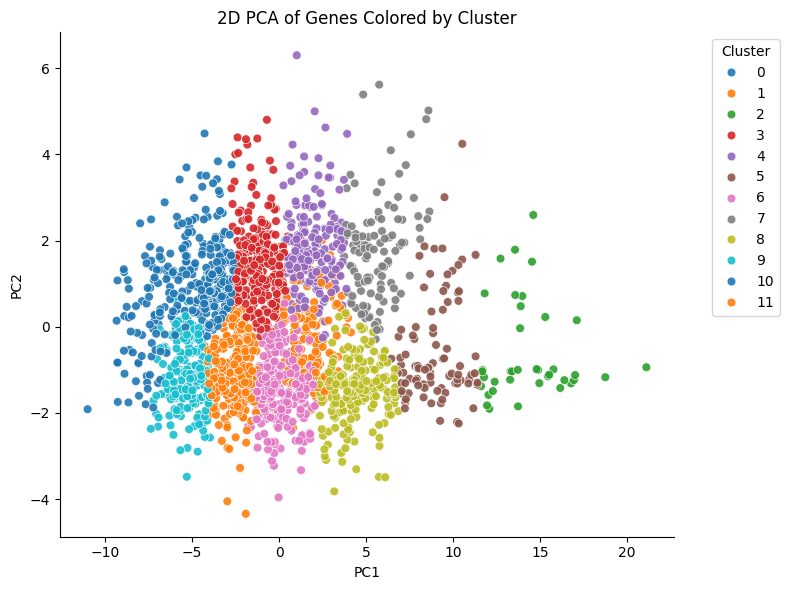

c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


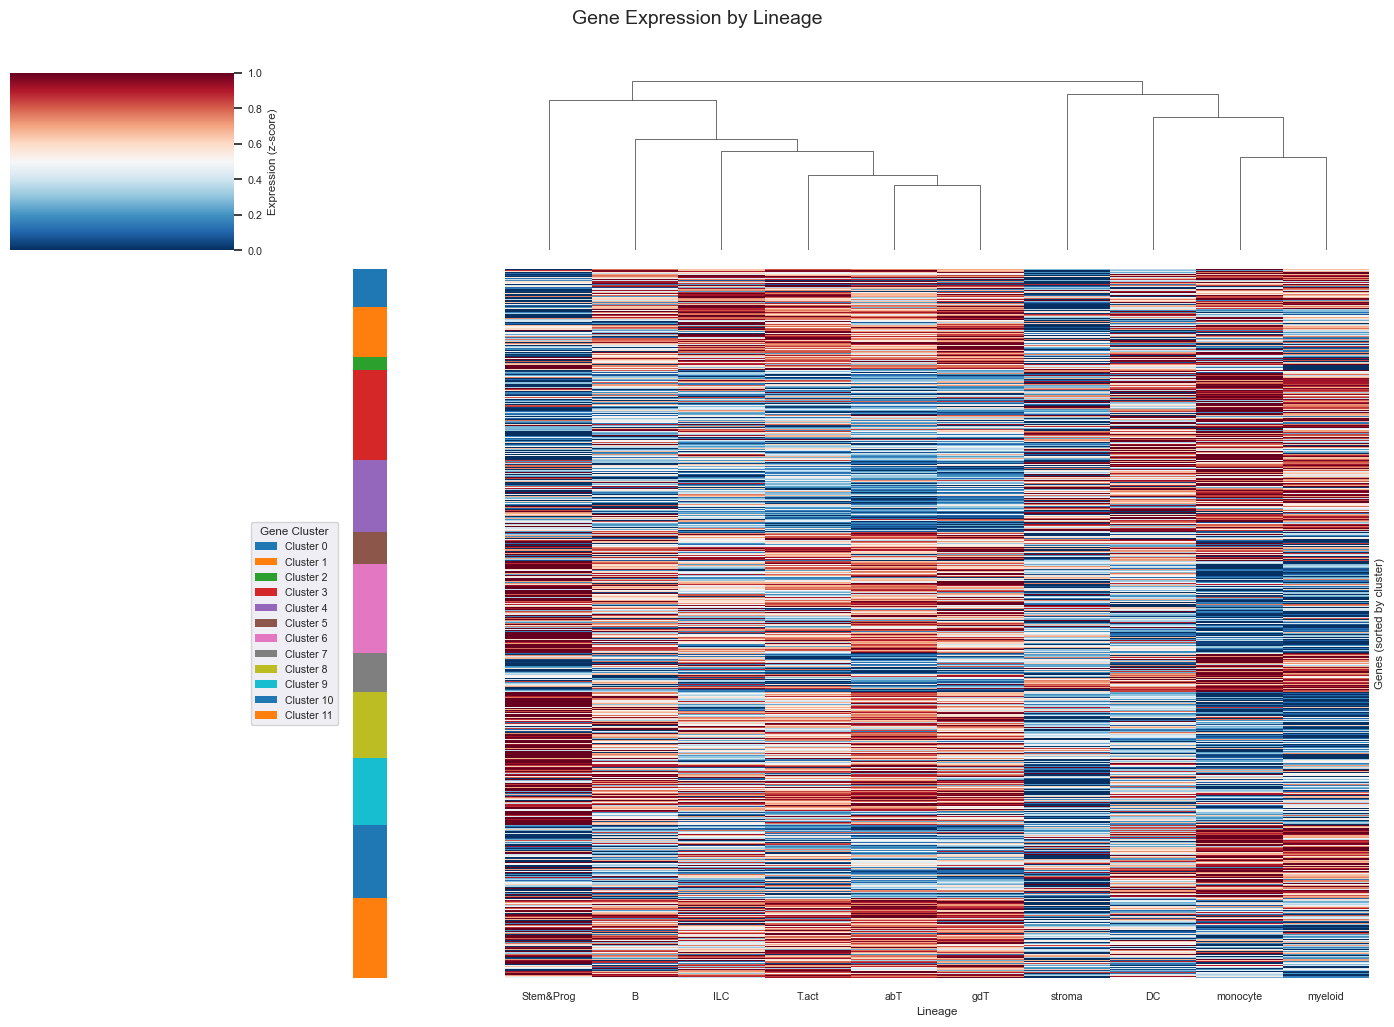

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def get_lineage_expression(RNA_seq_T, adata, top_n_genes=2000):
    common_samples = RNA_seq_T.index.intersection(adata.obs_names)
    if len(common_samples) == 0:
        raise ValueError("No common samples between RNA_seq_T and adata.obs_names.")
    RNA_df = RNA_seq_T.loc[common_samples]
    lineage_info = adata.obs.loc[common_samples, "Lineage"]
    lineage_expr = RNA_df.groupby(lineage_info).mean().T
    top_genes = lineage_expr.var(axis=1).nlargest(top_n_genes).index
    return lineage_expr.loc[top_genes]

def cluster_and_pca(lineage_expr, n_gene_clusters=12, n_pca_components=10):
    # PCA
    pca = PCA(n_components=n_pca_components)
    lineage_expr_pca = pd.DataFrame(
        pca.fit_transform(lineage_expr),
        index=lineage_expr.index,
        columns=[f"PC{i+1}" for i in range(n_pca_components)]
    )
    # KMeans
    kmeans = KMeans(n_clusters=n_gene_clusters, random_state=42)
    gene_clusters = kmeans.fit_predict(lineage_expr)
    gene_cluster_series = pd.Series(gene_clusters, index=lineage_expr.index)
    return lineage_expr_pca, gene_cluster_series

def plot_pca_clusters(lineage_expr, gene_cluster_series, cluster_palette):
    # 2D PCA
    pca_2d = PCA(n_components=2)
    pca_coords_2d = pca_2d.fit_transform(lineage_expr)
    pca_df_2d = pd.DataFrame(pca_coords_2d, index=lineage_expr.index, columns=["PC1", "PC2"])
    pca_df_2d["Cluster"] = gene_cluster_series
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=pca_df_2d, x="PC1", y="PC2", hue="Cluster",
        palette=cluster_palette, legend="full", s=40, alpha=0.9
    )
    plt.title("2D PCA of Genes Colored by Cluster")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()
    plt.tight_layout()
    plt.show()

def plot_clustermap(lineage_expr, gene_cluster_series, lineage_expr_pca, cluster_palette):
    gene_cluster_df = gene_cluster_series.rename("Cluster").to_frame()
    gene_cluster_with_pc1 = gene_cluster_df.join(lineage_expr_pca["PC1"])
    sorted_genes = gene_cluster_with_pc1.sort_values(["Cluster", "PC1"]).index
    lineage_expr_sorted = lineage_expr.loc[sorted_genes]
    row_colors_sorted = gene_cluster_series.loc[sorted_genes].map(cluster_palette)
    sns.set(font_scale=0.7)
    g = sns.clustermap(
        lineage_expr_sorted,
        row_colors=row_colors_sorted,
        cmap="RdBu_r",
        standard_scale=0,
        figsize=(14, 10),
        col_cluster=True,
        row_cluster=False,
        yticklabels=False,
        xticklabels=True,
        cbar_kws={"label": "Expression (z-score)"}
    )
    g.ax_heatmap.set_ylabel("Genes (sorted by cluster)")
    g.ax_heatmap.set_xlabel("Lineage")
    g.fig.suptitle("Gene Expression by Lineage", fontsize=14, y=1.02)
    # Custom legend for clusters
    for cluster_id, color in cluster_palette.items():
        g.ax_row_dendrogram.bar(0, 0, color=color, label=f"Cluster {cluster_id}", linewidth=0)
    g.ax_row_dendrogram.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="Gene Cluster")
    plt.tight_layout()
    plt.show()

# Main workflow
lineage_expr = get_lineage_expression(RNA_seq_T, adata, top_n_genes=2000)
n_gene_clusters = 12 #changable
n_pca_components = 10 #changable

lineage_expr_pca, gene_cluster_series = cluster_and_pca(lineage_expr, n_gene_clusters=n_gene_clusters, n_pca_components=n_pca_components)
cluster_colors = sns.color_palette("tab10", n_colors=n_gene_clusters)
cluster_palette = dict(zip(range(n_gene_clusters), cluster_colors))

plot_pca_clusters(lineage_expr, gene_cluster_series, cluster_palette)
plot_clustermap(lineage_expr, gene_cluster_series, lineage_expr_pca, cluster_palette)


correlating atac and rna clusters in heatmap

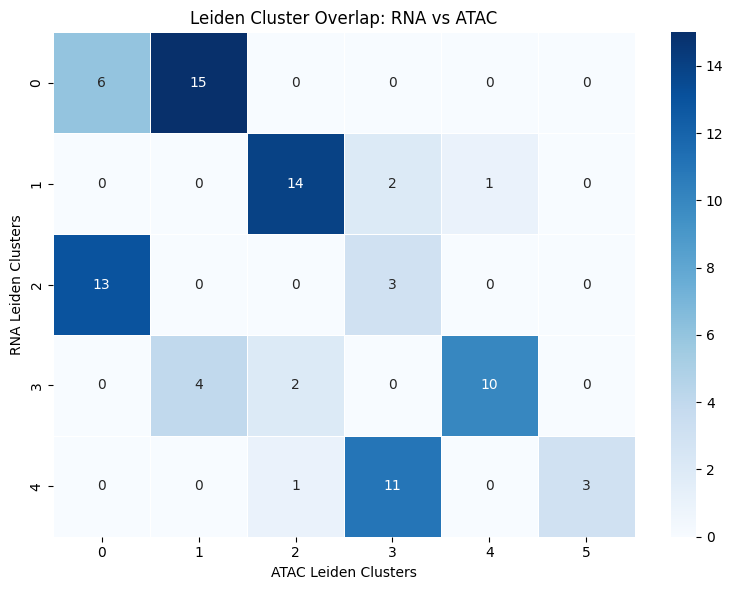

C:\Users\helen\AppData\Local\Temp\ipykernel_32912\3380690161.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  RNA_cluster_avg = RNA_profiles.groupby('cluster').mean()
C:\Users\helen\AppData\Local\Temp\ipykernel_32912\3380690161.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ATAC_cluster_avg = ATAC_profiles.groupby('cluster').mean()


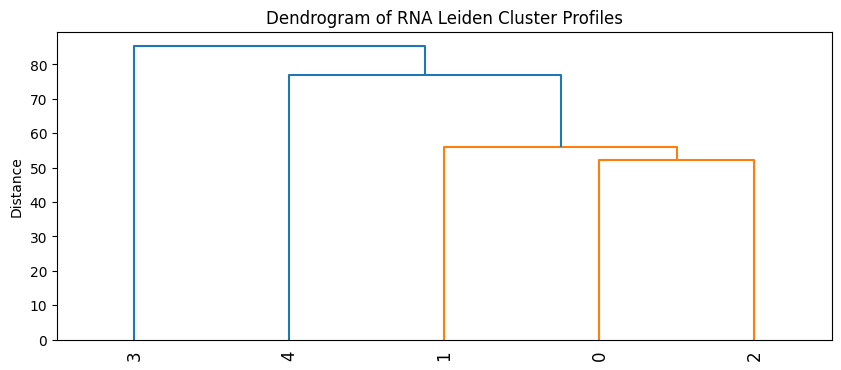

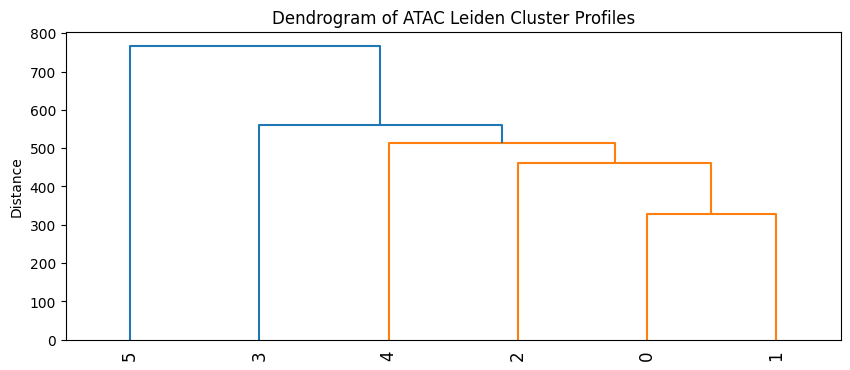

Adjusted Rand Index (RNA vs ATAC Leiden): 0.505
Normalized Mutual Information (RNA vs ATAC Leiden): 0.630


In [14]:
import importlib
import functions
importlib.reload(functions)

functions.set_user('Helen')
data = functions.call_data_clean(p_threshold=1.3)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

ATAC_scores= data['norm_scores']
RNA_seq_T = data['RNA_seq_T']
qc = data['QC_metrics']
qc.index = qc.index.str.replace(r"#\d+", "", regex=True)
qc = qc.loc[~qc.index.duplicated(keep='first')]
qc.index = qc.index.str.replace(
    r"FRC\.CD140a\+\.Madcam-\.CD35-\.SLN", 
    "FRC.SLN", 
    regex=True
)

common_cells = ATAC_scores.columns.intersection(RNA_seq_T.index)
valid_cells = common_cells.intersection(qc.index)

missing = set(common_cells) - set(valid_cells)
if missing:
    print(f"! Warning: {len(missing)} cells missing in QC metrics: {list(missing)[:5]}")

ATAC_T = ATAC_scores[valid_cells].T
RNA_T = RNA_seq_T.loc[valid_cells]

common_cells = ATAC_scores.columns.intersection(RNA_seq_T.index) 
lineage = qc.loc[valid_cells, 'Lineage'].str.replace(r"#\d+", "", regex=True)


ATAC_T = ATAC_scores[common_cells].T 
ATAC_T_scaled = pd.DataFrame(
    StandardScaler().fit_transform(ATAC_T),
    index=ATAC_T.index,
    columns=ATAC_T.columns
)

RNA_T = RNA_seq_T.loc[common_cells]
RNA_T_scaled = pd.DataFrame(
    StandardScaler().fit_transform(RNA_T),
    index=RNA_T.index,
    columns=RNA_T.columns
)


adata_atac = sc.AnnData(ATAC_T_scaled)
adata_atac.obs['lineage'] = lineage
sc.pp.pca(adata_atac)
sc.pp.neighbors(adata_atac)
sc.tl.leiden(adata_atac, key_added='leiden_atac')

adata_rna = sc.AnnData(RNA_T_scaled)
adata_rna.obs['lineage'] = lineage
sc.pp.pca(adata_rna)
sc.pp.neighbors(adata_rna)
sc.tl.leiden(adata_rna, key_added='leiden_rna')

common_cells = adata_rna.obs_names.intersection(adata_atac.obs_names)
leiden_rna_labels = adata_rna.obs.loc[common_cells, 'leiden_rna']
leiden_atac_labels = adata_atac.obs.loc[common_cells, 'leiden_atac']
# Contingency table (RNA vs ATAC)
contingency = pd.crosstab(leiden_rna_labels, leiden_atac_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(
    contingency,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5
)
plt.title("Leiden Cluster Overlap: RNA vs ATAC")
plt.xlabel("ATAC Leiden Clusters")
plt.ylabel("RNA Leiden Clusters")
plt.tight_layout()
plt.show()


#dendograms

RNA_profiles = RNA_T_scaled.copy()
RNA_profiles['cluster'] = adata_rna.obs['leiden_rna']
RNA_cluster_avg = RNA_profiles.groupby('cluster').mean()

ATAC_profiles = ATAC_T_scaled.copy()
ATAC_profiles['cluster'] = adata_atac.obs['leiden_atac']
ATAC_cluster_avg = ATAC_profiles.groupby('cluster').mean()

# RNA dendrogram
plt.figure(figsize=(10, 4))
Z_rna = linkage(RNA_cluster_avg, method='average')
dendrogram(Z_rna, labels=RNA_cluster_avg.index, leaf_rotation=90)
plt.title("Dendrogram of RNA Leiden Cluster Profiles")
plt.ylabel("Distance")
plt.show()

# ATAC dendrogram
plt.figure(figsize=(10, 4))
Z_atac = linkage(ATAC_cluster_avg, method='average')
dendrogram(Z_atac, labels=ATAC_cluster_avg.index, leaf_rotation=90)
plt.title("Dendrogram of ATAC Leiden Cluster Profiles")
plt.ylabel("Distance")
plt.show()

ari = adjusted_rand_score(leiden_rna_labels, leiden_atac_labels)
nmi = normalized_mutual_info_score(leiden_rna_labels, leiden_atac_labels)

print(f"Adjusted Rand Index (RNA vs ATAC Leiden): {ari:.3f}")
print(f"Normalized Mutual Information (RNA vs ATAC Leiden): {nmi:.3f}")


now we will compute mds plots leiden atac/rna

C:\Users\helen\AppData\Local\Temp\ipykernel_32912\458372964.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  RNA_cluster_avg = RNA_T_scaled.groupby(adata.obs["leiden"]).mean()
C:\Users\helen\AppData\Local\Temp\ipykernel_32912\458372964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ATAC_cluster_avg = ATAC_T_scaled.groupby(adata.obs["leiden"]).mean()
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-g

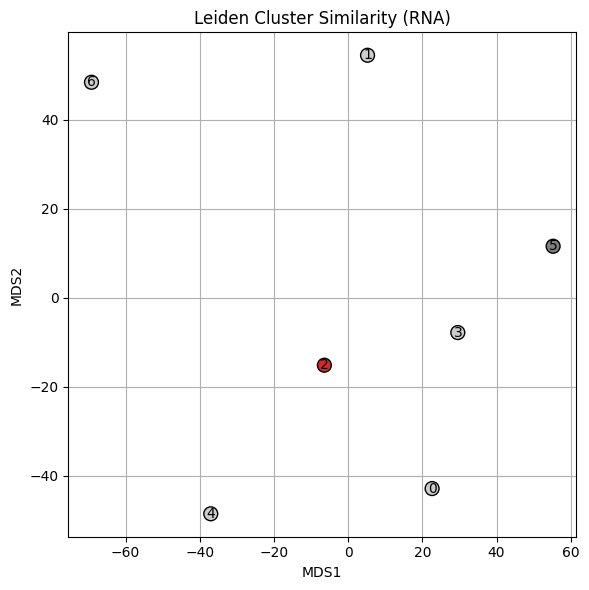

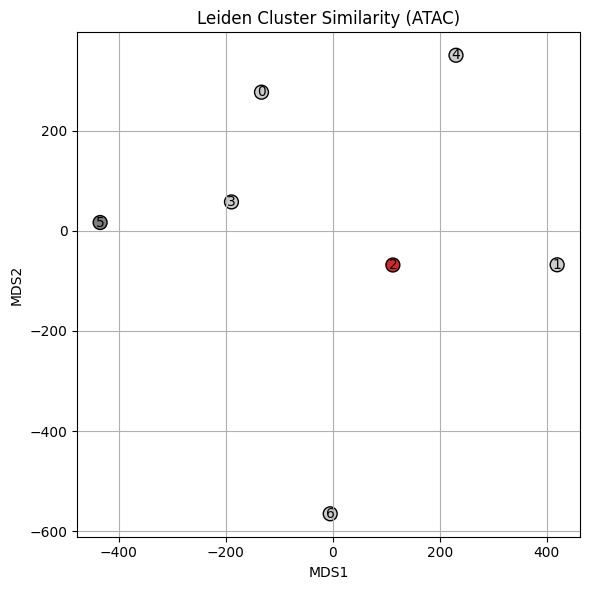

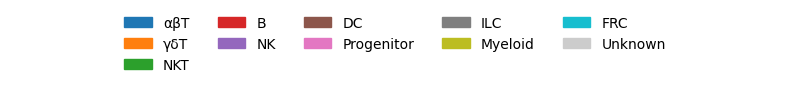

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform


adata = sc.AnnData(ATAC_scores.T)
qc = data['QC_metrics']
qc.index = qc.index.str.replace(r"#\d+", "", regex=True)
qc = qc.loc[~qc.index.duplicated(keep='first')]
qc.index = qc.index.str.replace(
    r"FRC\.CD140a\+\.Madcam-\.CD35-\.SLN", 
    "FRC.SLN", 
    regex=True
)
adata.obs = adata.obs.join(qc, how='left')
lineage = qc.loc[valid_cells, 'Lineage'].str.replace(r"#\d+", "", regex=True)
adata.obs['lineage'] = lineage
sc.pp.neighbors(adata, use_rep="X", n_neighbors=15, metric='euclidean')
sc.tl.leiden(adata, resolution=1.0)

if "leiden" not in adata.obs.columns:
    raise ValueError("Leiden clustering not found in adata.obs")

#mean profiles( grouped by lc)
RNA_cluster_avg = RNA_T_scaled.groupby(adata.obs["leiden"]).mean()
ATAC_cluster_avg = ATAC_T_scaled.groupby(adata.obs["leiden"]).mean()

#pairwise distances
rna_distances = squareform(pdist(RNA_cluster_avg, metric='euclidean'))
atac_distances = squareform(pdist(ATAC_cluster_avg, metric='euclidean'))

# MDS projection
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
rna_mds_coords = mds.fit_transform(rna_distances)
atac_mds_coords = mds.fit_transform(atac_distances)

#lineage color mapping-
qc_lineage_mapping = qc[['CellType', 'Lineage']].drop_duplicates(subset=['CellType'], keep='first')
qc_lineage_mapping.set_index('CellType', inplace=True)
adata.obs = adata.obs.merge(qc_lineage_mapping, left_index=True, right_index=True, how='left')

lineage_colors = {
    'αβT': '#1f77b4', 'γδT': '#ff7f0e', 'NKT': '#2ca02c',
    'B': '#d62728', 'NK': '#9467bd', 'DC': '#8c564b',
    'Progenitor': '#e377c2', 'ILC': '#7f7f7f',
    'Myeloid': '#bcbd22', 'FRC': '#17becf', 'Unknown': '#cccccc'
}

# lineage in leiden clusters
cluster_lineage = (
    adata.obs.groupby("leiden")["lineage"]
    .agg(lambda x: x.value_counts().idxmax() if not x.isna().all() else "Unknown")
)

cluster_lineages = cluster_lineage.loc[RNA_cluster_avg.index].fillna("Unknown")
cluster_colors = cluster_lineages.map(lineage_colors).fillna('#cccccc').values
leiden_labels = RNA_cluster_avg.index.astype(str)

# RNA MDS
plt.figure(figsize=(6, 6))
plt.scatter(rna_mds_coords[:, 0], rna_mds_coords[:, 1], c=cluster_colors, edgecolor='k', s=100)
for i, label in enumerate(leiden_labels):
    plt.text(rna_mds_coords[i, 0], rna_mds_coords[i, 1], label, fontsize=10, ha='center', va='center')
plt.title("Leiden Cluster Similarity (RNA)")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.grid(True)
plt.tight_layout()
plt.show()

# ATAC MDS 
plt.figure(figsize=(6, 6))
plt.scatter(atac_mds_coords[:, 0], atac_mds_coords[:, 1], c=cluster_colors, edgecolor='k', s=100)
for i, label in enumerate(leiden_labels):
    plt.text(atac_mds_coords[i, 0], atac_mds_coords[i, 1], label, fontsize=10, ha='center', va='center')
plt.title("Leiden Cluster Similarity (ATAC)")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.grid(True)
plt.tight_layout()
plt.show()

#lineage legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=c, label=l) for l, c in lineage_colors.items()]
plt.figure(figsize=(8, 1))
plt.legend(handles=legend_handles, ncol=5, loc='center', frameon=False)
plt.axis('off')
plt.tight_layout()
plt.show()

RNA shape: (85, 6451)
ATAC shape: (85, 363046)


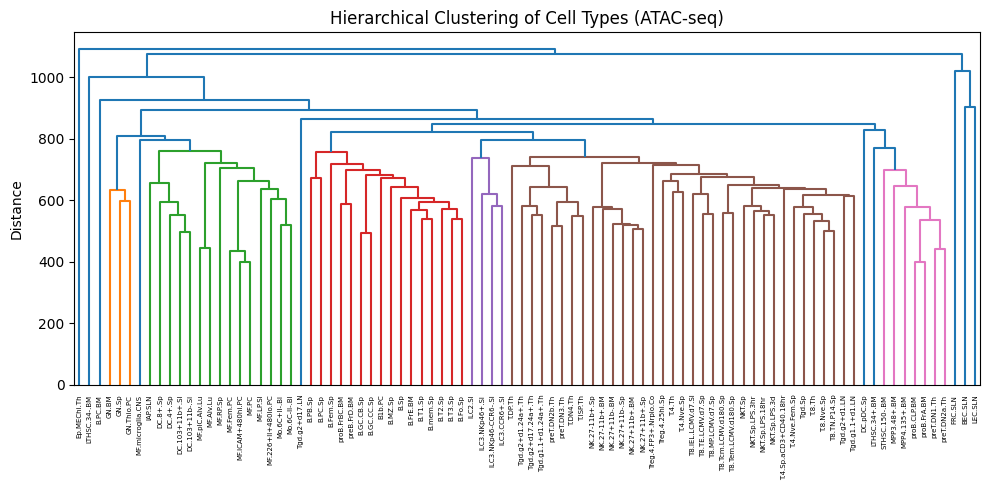

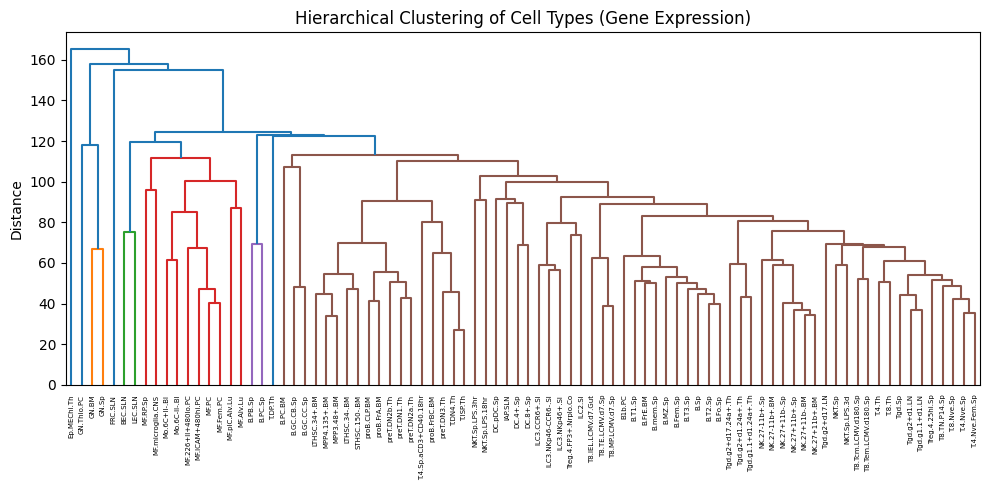

Cophenetic correlation between RNA and ATAC clustering: nan
Cophenetic correlation coefficient (RNA): 0.893
Cophenetic correlation coefficient (ATAC): 0.910


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial import ConvexHull
import scanpy as sc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


#ATAC
ATAC_scores = data['norm_scores']
ATAC_scores_T = ATAC_scores.T

scaler = StandardScaler()
ATAC_T_scaled = pd.DataFrame(
    scaler.fit_transform(ATAC_scores_T),
    index=ATAC_scores_T.index,
    columns=ATAC_scores_T.columns
)
linkage_atac = linkage(ATAC_T_scaled, method='average')


#RNA
RNA_T = data['RNA_seq_T']

# Z-score normalization
scaler = StandardScaler()
RNA_seq_T_scaled = pd.DataFrame(
    scaler.fit_transform(RNA_seq_T),
    index=RNA_seq_T.index,
    columns=RNA_seq_T.columns
)

linkage_RNA = linkage(RNA_seq_T_scaled, method='average')

common_samples = RNA_seq_T_scaled.index.intersection(ATAC_T_scaled.index)
RNA_seq_log_scaled_common = RNA_seq_T_scaled.loc[common_samples].sort_index()
ATAC_T_scaled_common = ATAC_T_scaled.loc[common_samples].sort_index()

#both matrices same shape?
print("RNA shape:", RNA_seq_log_scaled_common.shape)
print("ATAC shape:", ATAC_T_scaled_common.shape)

#dendogram atac
plt.figure(figsize=(10, 5))
dendrogram(linkage_atac, labels=ATAC_T_scaled.index, leaf_rotation=90)

plt.title("Hierarchical Clustering of Cell Types (ATAC-seq)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# dendrogram rna
plt.figure(figsize=(10, 5))
dendrogram(linkage_RNA, labels=RNA_seq_T_scaled.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cell Types (Gene Expression)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#distance matrices
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
from scipy.stats import spearmanr


coph_RNA, _ = cophenet(linkage_RNA, pdist(RNA_seq_T_scaled))
coph_atac, _ = cophenet(linkage_atac, pdist(ATAC_T_scaled))
from scipy.stats import spearmanr
corr, _ = spearmanr(coph_RNA, coph_atac)
print(f"Cophenetic correlation between RNA and ATAC clustering: {corr:.3f}")


# To compare, make sure the arrays are the same length (they won't be unless the input matrices are the same shape)
# If you want to compare the cophenetic distances, you need to use the same set of samples/features for both.
# Otherwise, just print both cophenetic correlation coefficients separately:

print(f"Cophenetic correlation coefficient (RNA): {coph_RNA.mean():.3f}")
print(f"Cophenetic correlation coefficient (ATAC): {coph_atac.mean():.3f}")



